In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [79]:
data = pd.read_csv('https://storage.googleapis.com/data-ia-final/data.csv')
data.drop(['ID'], axis=1, inplace=True)
data_normalized = pd.read_csv('../tmp/data/data_normalized.csv')
target = data_normalized['Status']
# data_normalized.drop(['Status'], axis=1, inplace=True)

data_normalized

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,term,Neg_ammortization,...,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_>74,Region_North,Region_Central,Region_South,Region_North-East
0,1.0,0.0,0,0,1,206500,3.990,2596.45,360.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0
1,1.0,0.0,0,0,0,466500,3.990,2596.45,360.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0
2,1.0,0.0,0,0,1,656500,3.990,2596.45,360.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0
3,1.0,0.0,0,0,0,106500,3.990,2596.45,240.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0
4,1.0,0.0,0,0,0,406500,3.990,2596.45,360.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,1.0,0.0,0,0,0,246500,4.125,3427.25,300.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0
148666,1.0,0.0,0,0,0,246500,3.875,4661.38,360.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0
148667,1.0,0.0,0,0,1,656500,3.990,2596.45,360.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0
148668,1.0,0.0,0,0,0,656500,3.490,1190.05,360.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0


In [44]:
inertias = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data_normalized)
  inertias.append(kmeans.inertia_)


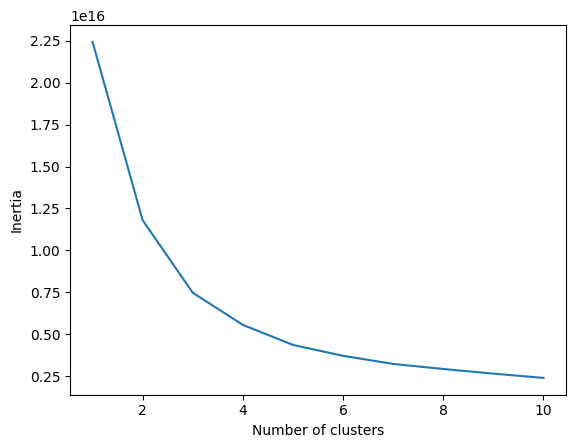

In [80]:
plt.plot(range(1, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
# 3 ou 4 klustes

In [81]:
kmeans = KMeans(n_clusters=4)
fitted = kmeans.fit(data_normalized)


In [82]:
labels = kmeans.labels_
labels

array([0, 3, 3, ..., 1, 1, 2], dtype=int32)

In [83]:
correct_labels = sum(target == labels)
correct_labels

53970

In [84]:
data_normalized['cluster'] = kmeans.predict(data_normalized)
data_normalized['cluster']

0         0
1         3
2         3
3         0
4         3
         ..
148665    0
148666    0
148667    1
148668    1
148669    2
Name: cluster, Length: 148670, dtype: int32

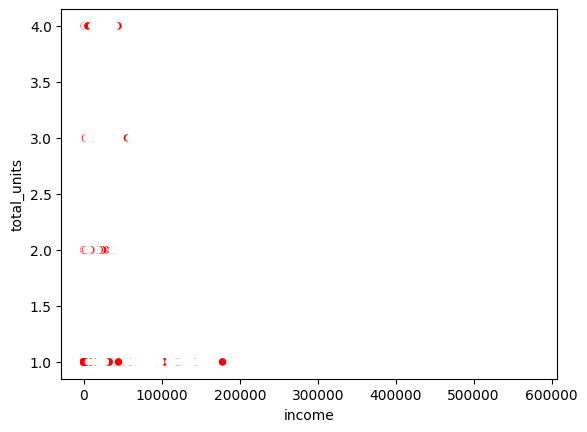

In [85]:
colors = {0:'red', 1:'white', 2:'white', 3:'white'}
data_normalized.plot.scatter(x='income', y='total_units', c=data_normalized['cluster'].apply(lambda x: colors[x]))

# Show the plot
plt.show()

In [86]:
for c in set(data_normalized['cluster']):
    cluster = data_normalized[data_normalized['cluster'] == c]
    print(f"Cluster {c}:")
    print(cluster['business_or_commercial'].value_counts())
    print(cluster.describe())

Cluster 0:
0    55801
1    15304
Name: business_or_commercial, dtype: int64
         loan_limit  approv_in_adv  Credit_Worthiness   open_credit  \
count  71105.000000   71105.000000       71105.000000  71105.000000   
mean       0.932410       0.171380           0.043316      0.001631   
std        0.251043       0.376844           0.203569      0.040358   
min        0.000000       0.000000           0.000000      0.000000   
25%        1.000000       0.000000           0.000000      0.000000   
50%        1.000000       0.000000           0.000000      0.000000   
75%        1.000000       0.000000           0.000000      0.000000   
max        1.000000       1.000000           1.000000      1.000000   

       business_or_commercial    loan_amount  rate_of_interest  \
count            71105.000000   71105.000000      71105.000000   
mean                 0.215231  194307.045918          4.099444   
std                  0.410985   68520.364863          0.485577   
min                 

In [87]:
data_normalized['label'] = data_normalized['cluster'].map({ 0: 'High income', 1: 'Low income', 2: 'Very high income', 3: 'Average income' })
data_normalized['label'].value_counts()

High income         71105
Average income      55866
Low income          19870
Very high income     1829
Name: label, dtype: int64

In [93]:
grouped = data_normalized.groupby('cluster')
grouped['Status'].value_counts()
# fraud_propensity = grouped['Status'].mean()
# fraud_propensity
# 0 27.5% - High income
# 1 12%.8% - Low income
# 2 43.45% - Very high income
# 3 25.02% - Average income

cluster  Status
0        0         51423
         1         19682
1        0         17323
         1          2547
2        0          1400
         1           429
3        0         41885
         1         13981
Name: Status, dtype: int64

In [94]:
grouped['Status'].count()

cluster
0    71105
1    19870
2     1829
3    55866
Name: Status, dtype: int64